In [ ]:
#%pip install pystan

In [ ]:
import pandas as pd
from prophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import warnings

In [ ]:
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hashcode11/cisco.csv')
df.head()


,Business Unit,Product Family,PLID,Fiscal Quarter,Fiscal Month,Booked_Qty,Booking_Date
0,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,AUG FY2022,204,01-08-2016
1,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,OCT FY2022,564,01-10-2016
2,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,SEP FY2022,1476,01-09-2016
3,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,AUG FY2002,374,01-08-2017
4,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,OCT FY2002,6094,01-10-2017


In [ ]:
df.dtypes


Business Unit     object
Product Family    object
PLID              object
Fiscal Quarter    object
Fiscal Month      object
Booked_Qty         int64
Booking_Date      object
dtype: object

In [ ]:
df.columns = ['BU','PF','PLID','FQ','FM','Order_Demand','Date']

In [ ]:
df = df.drop(['FQ', 'FM'], axis=1)
df.head()

,BU,PF,PLID,Order_Demand,Date
0,CSWBU,CBR8,CBR-D121-DS-MOD,204,01-08-2016
1,CSWBU,CBR8,CBR-D121-DS-MOD,564,01-10-2016
2,CSWBU,CBR8,CBR-D121-DS-MOD,1476,01-09-2016
3,CSWBU,CBR8,CBR-D121-DS-MOD,374,01-08-2017
4,CSWBU,CBR8,CBR-D121-DS-MOD,6094,01-10-2017


<Axes: xlabel='BU', ylabel='count'>

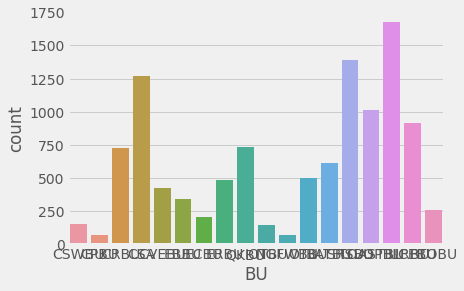

In [ ]:
# Find the aggregate demand among the Buisness units
sns.countplot(x = 'BU', data = df)

In [ ]:
df.BU.unique()

array(['CSWBU', 'CPBU', 'CRBU', 'CSA', 'CVEBU', 'EBBU', 'ECBU', 'ERBU',
       'QKBU', 'IOTBU', 'NGFWBU', 'OTBU', 'BATBU', 'SRSBU', 'TOASTBU',
       'UOPBLRBU', 'UCEBU', 'RTOBU'], dtype=object)

In [ ]:
df = df[df['BU'] == 'UOPBLRBU']
df



,BU,PF,PLID,Order_Demand,Date
8145,UOPBLRBU,C1000,C1000-24T-4G-L,636,01-08-2021
8146,UOPBLRBU,C1000,C1000-24T-4G-L,2289,01-10-2021
8147,UOPBLRBU,C1000,C1000-24T-4G-L,2037,01-09-2021
8148,UOPBLRBU,C1000,C1000-24T-4G-L,6358,01-08-2022
8149,UOPBLRBU,C1000,C1000-24T-4G-L,10809,01-10-2022
...,...,...,...,...,...
9815,UOPBLRBU,C9400,C9410R-96U-BNDL-A,388,01-06-2020
9816,UOPBLRBU,C9400,C9410R-96U-BNDL-A,272,01-05-2020
9817,UOPBLRBU,C9400,C9410R-96U-BNDL-A,1348,01-07-2021
9818,UOPBLRBU,C9400,C9410R-96U-BNDL-A,581,01-06-2021


<Axes: xlabel='PF', ylabel='count'>

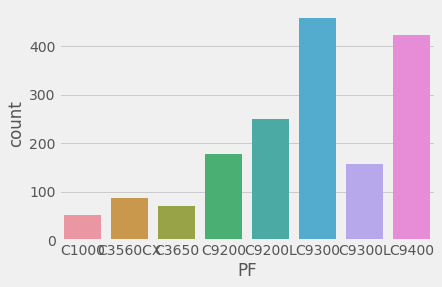

In [ ]:
# Find the aggregate demand among the Buisness units
sns.countplot(x = 'PF', data = df)

In [ ]:
df = df[df['PF'] == 'C9300']
df['PLID'].unique()

array(['C9300-24P', 'C9300-24T', 'C9300-24UX', 'C9300-48H', 'C9300-48P',
       'C9300-48T', 'C9300-48UN', 'C9300-48UXM', 'C9300-NM-8X'],
      dtype=object)

<Axes: xlabel='PLID', ylabel='count'>

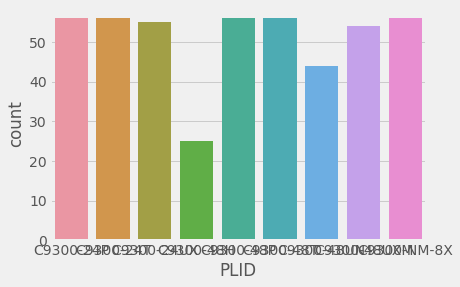

In [ ]:
# Find the aggregate demand among the Buisness units
sns.countplot(x = 'PLID', data = df)

In [ ]:
df['PF'].unique()

array(['C9300'], dtype=object)

In [ ]:
df['PLID'].unique()

array(['C9300-24P', 'C9300-24T', 'C9300-24UX', 'C9300-48H', 'C9300-48P',
       'C9300-48T', 'C9300-48UN', 'C9300-48UXM', 'C9300-NM-8X'],
      dtype=object)

In [ ]:
df = df[df['PLID'] == 'C9300-24P']
df

,BU,PF,PLID,Order_Demand,Date
8781,UOPBLRBU,C9300,C9300-24P,86,01-08-2018
8782,UOPBLRBU,C9300,C9300-24P,2253,01-10-2018
8783,UOPBLRBU,C9300,C9300-24P,169,01-09-2018
8784,UOPBLRBU,C9300,C9300-24P,2316,01-08-2019
8785,UOPBLRBU,C9300,C9300-24P,7424,01-10-2019
8786,UOPBLRBU,C9300,C9300-24P,3908,01-09-2019
8787,UOPBLRBU,C9300,C9300-24P,6220,01-08-2020
8788,UOPBLRBU,C9300,C9300-24P,7484,01-10-2020
8789,UOPBLRBU,C9300,C9300-24P,3561,01-09-2020
8790,UOPBLRBU,C9300,C9300-24P,2662,01-08-2021


In [ ]:

df.drop(['BU','PF','PLID'], axis=1, inplace=True)
#df['Order_Demand'] = df11['Order_Demand'].str.replace('[^0-9-]','').apply(np.int64)
df['Date'] = pd.to_datetime(df['Date'] ,format='%d-%m-%Y')
df.sort_values(by='Date', inplace = True)
df


,Order_Demand,Date
8824,32,2017-06-01
8823,315,2017-07-01
8797,2039,2018-01-01
8812,1440,2018-02-01
8813,1222,2018-03-01
8811,3428,2018-04-01
8827,1764,2018-05-01
8826,4293,2018-06-01
8825,11734,2018-07-01
8781,86,2018-08-01


In [ ]:
df11 = df.groupby('Date')['Order_Demand'].sum().reset_index()

In [ ]:
from datetime import datetime
trim_date = datetime(2021, 12, 31)
df11 = df11[df11['Date'] <= trim_date]

In [ ]:
df11

,Date,Order_Demand
0,2017-06-01,32
1,2017-07-01,315
2,2018-01-01,2039
3,2018-02-01,1440
4,2018-03-01,1222
5,2018-04-01,3428
6,2018-05-01,1764
7,2018-06-01,4293
8,2018-07-01,11734
9,2018-08-01,86


In [ ]:

df11.set_index('Date', inplace=True)
df11



,Order_Demand
Date,
2017-06-01,32
2017-07-01,315
2018-01-01,2039
2018-02-01,1440
2018-03-01,1222
2018-04-01,3428
2018-05-01,1764
2018-06-01,4293
2018-07-01,11734


In [ ]:
def create_feature(dataframe):
    dataframe = dataframe.copy()
    dataframe['day_of_the_week'] = dataframe.index.dayofweek
    dataframe['Quarter'] = dataframe.index.quarter
    dataframe['Month'] = dataframe.index.month
    dataframe['Year'] = dataframe.index.year
    dataframe['Week'] = dataframe.index.isocalendar().week.astype(int)
    return dataframe

df = create_feature(df11)
# features, Target variable
Features = ['day_of_the_week', 'Quarter','Month', 'Year', 'Week']
target = ['Demand']
df

,Order_Demand,day_of_the_week,Quarter,Month,Year,Week
Date,,,,,,
2017-06-01,32,3,2,6,2017,22
2017-07-01,315,5,3,7,2017,26
2018-01-01,2039,0,1,1,2018,1
2018-02-01,1440,3,1,2,2018,5
2018-03-01,1222,3,1,3,2018,9
2018-04-01,3428,6,2,4,2018,13
2018-05-01,1764,1,2,5,2018,18
2018-06-01,4293,4,2,6,2018,22
2018-07-01,11734,6,3,7,2018,26


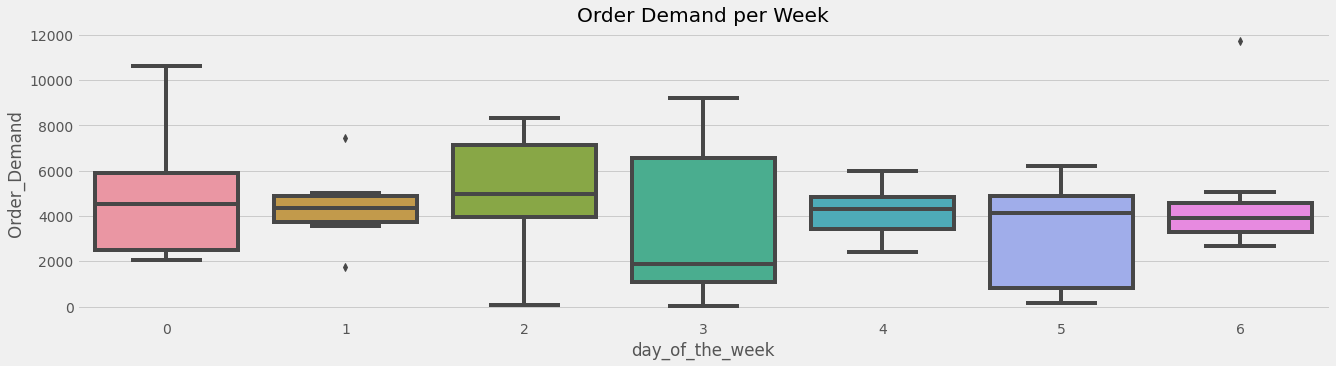

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=df, x='day_of_the_week', y='Order_Demand')
ax.set_title('Order Demand per Week')
plt.show()

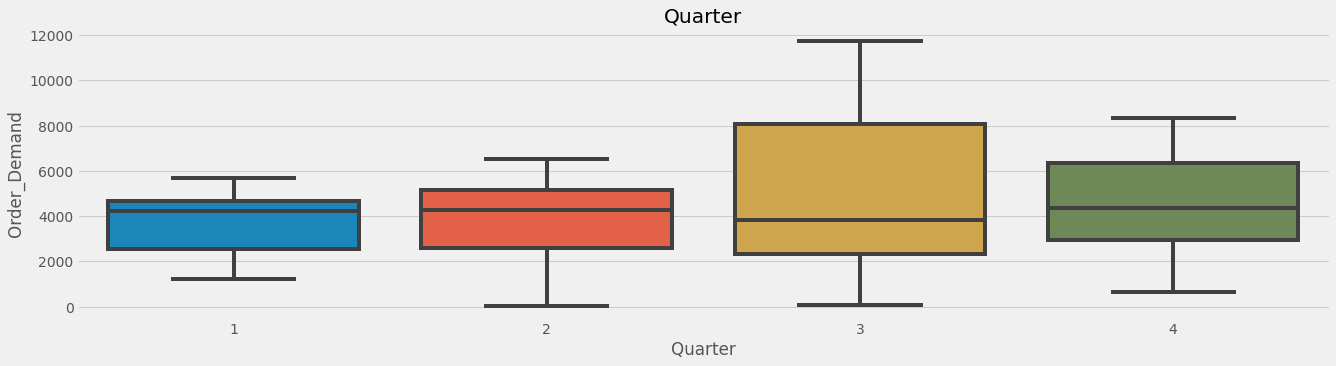

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=df, x='Quarter', y='Order_Demand')
ax.set_title('Quarter')
plt.show()

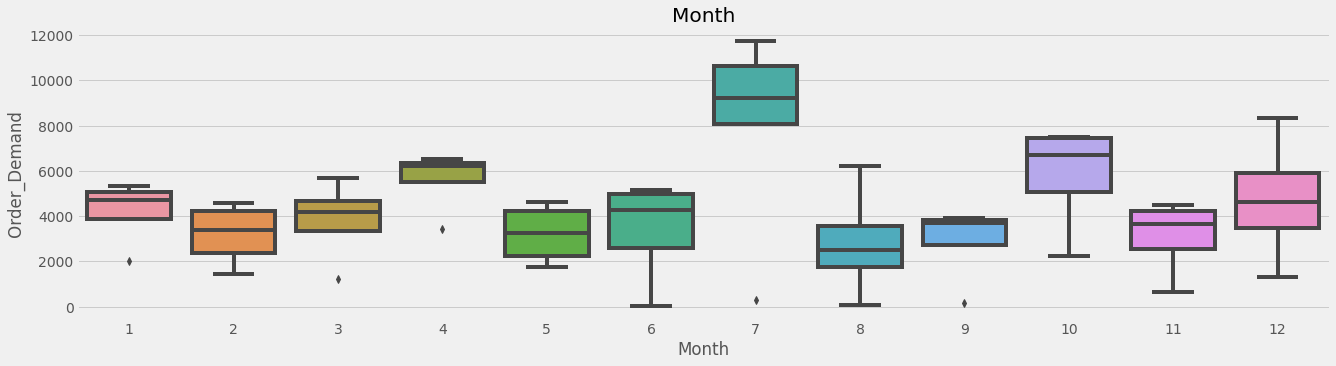

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=df, x='Month', y='Order_Demand')
ax.set_title('Month')
plt.show()

In [ ]:
# Resample data as Weekly 
df_week = df.resample('W').mean()

In [ ]:
# df_week['Order_Demand'].plot(figsize = (15,4), title = 'Weekly Order demand')
# plt.show()

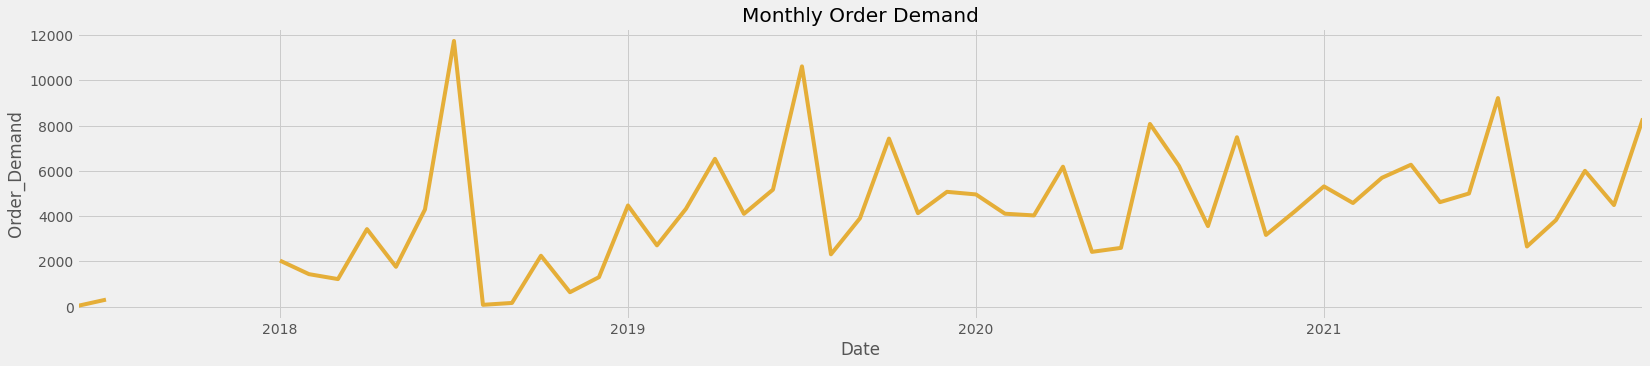

In [ ]:
color_pal = sns.color_palette()
df_month = df.resample('MS').mean()
df_month.Order_Demand.plot(figsize = (25,5), title = 'Monthly Order Demand', color = color_pal[2])
plt.ylabel('Order_Demand')
plt.show()

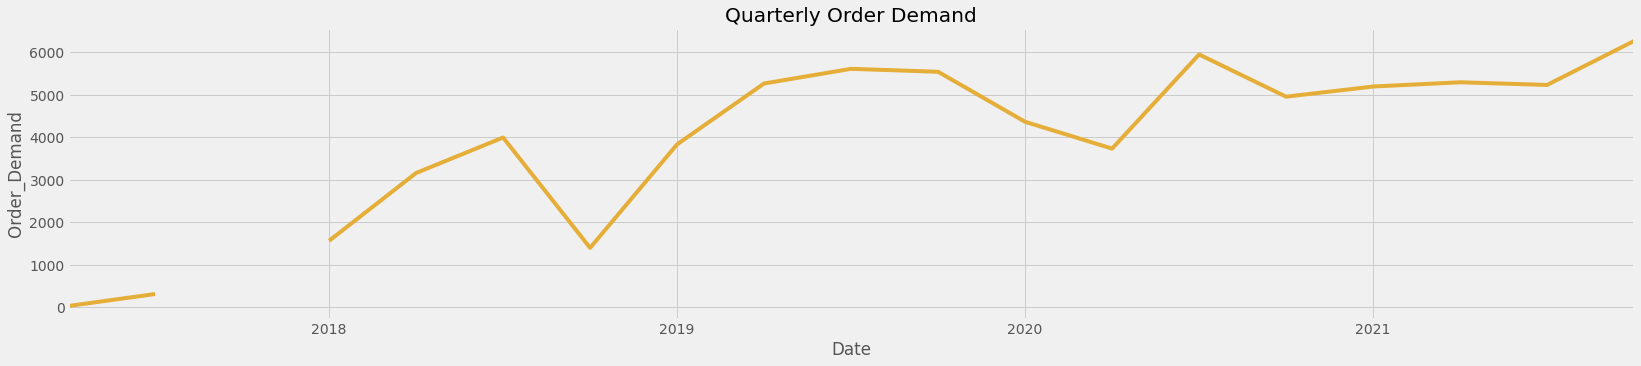

In [ ]:
color_pal = sns.color_palette()
df_Q = df.resample('Q').mean()
df_Q.Order_Demand.plot(figsize = (25,5), title = 'Quarterly Order Demand', color = color_pal[2])
plt.ylabel('Order_Demand')
plt.show()

In [ ]:
df_month

,Order_Demand,day_of_the_week,Quarter,Month,Year,Week
Date,,,,,,
2017-06-01,32.0,3.0,2.0,6.0,2017.0,22.0
2017-07-01,315.0,5.0,3.0,7.0,2017.0,26.0
2017-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,2039.0,0.0,1.0,1.0,2018.0,1.0
2018-02-01,1440.0,3.0,1.0,2.0,2018.0,5.0


In [ ]:
#for fashion purposes ezez
plt.style.use('fivethirtyeight')

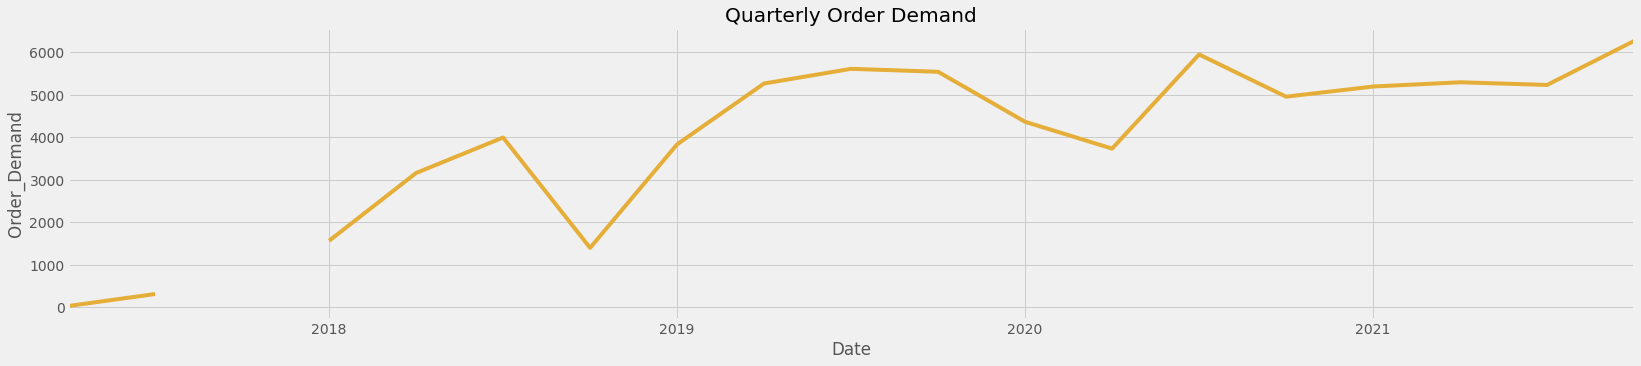

In [ ]:
color_pal = sns.color_palette()
df_Q= df.resample('Q').mean()
df_Q.Order_Demand.plot(figsize = (25,5), title = 'Quarterly Order Demand', color = color_pal[2])
plt.ylabel('Order_Demand')
plt.show()

In [ ]:
df['Year'].unique()

array([2017, 2018, 2019, 2020, 2021])

In [ ]:
# #Seasonal decomposition using moving averages
# from pylab import rcParams
# from statsmodels.tsa.seasonal import seasonal_decompose
# rcParams['figure.figsize'] = 25, 10
# decomposition = seasonal_decompose(df_Q.Order_Demand.values, model='additive', period = 12)
                   
# fig = decomposition.plot()
# plt.show()

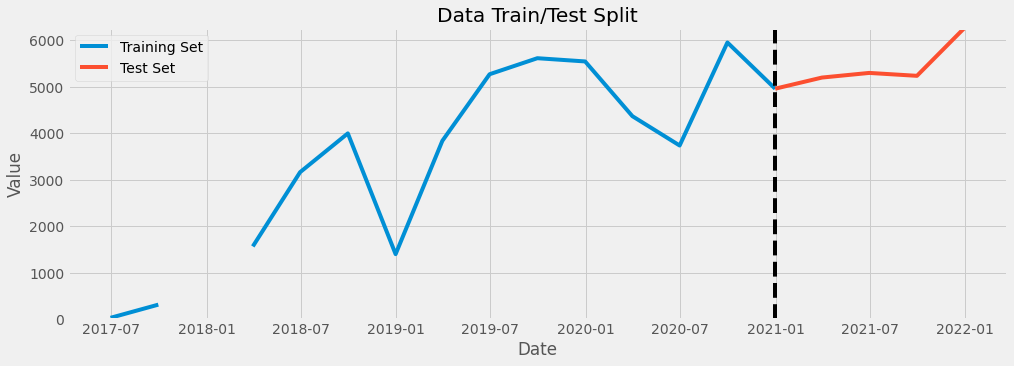

In [ ]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

train_end = datetime(2020, 12, 31)
test_end = datetime(2021, 12, 31)

df_train = df_Q[:train_end]
df_test = df_Q[train_end:test_end]

fig, ax = plt.subplots(figsize=(15, 5))

# Plot training data
ax.plot(df_train.index, df_train['Order_Demand'], label='Training Set')

# Plot testing data
ax.plot(df_test.index, df_test['Order_Demand'], label='Test Set')

# Add vertical line for split point
ax.axvline(train_end, color='black', ls='--')

# Add axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# Set y-axis limits to be the same for both plots
ax.set_ylim([0, max(df_train['Order_Demand'].max(), df_test['Order_Demand'].max())])

# Add legend
ax.legend()

# Add title
ax.set_title('Data Train/Test Split')

plt.show()


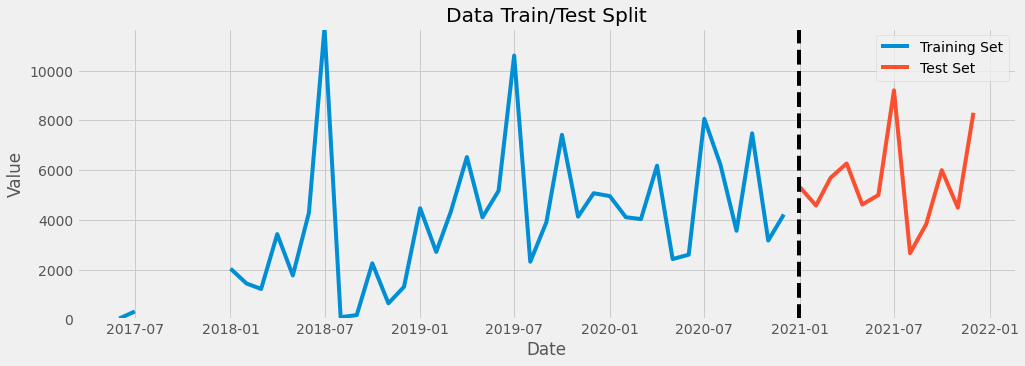

In [ ]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

train_end = datetime(2020, 12, 31)
test_end = datetime(2021, 12, 31)

df_train = df_month[:train_end]
df_test = df_month[train_end:test_end]

fig, ax = plt.subplots(figsize=(15, 5))

# Plot training data
ax.plot(df_train.index, df_train['Order_Demand'], label='Training Set')

# Plot testing data
ax.plot(df_test.index, df_test['Order_Demand'], label='Test Set')

# Add vertical line for split point
ax.axvline(train_end, color='black', ls='--')

# Add axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# Set y-axis limits to be the same for both plots
ax.set_ylim([0, max(df_train['Order_Demand'].max(), df_test['Order_Demand'].max())])

# Add legend
ax.legend()

# Add title
ax.set_title('Data Train/Test Split')

plt.show()


In [ ]:
df_train

,Order_Demand,day_of_the_week,Quarter,Month,Year,Week
Date,,,,,,
2017-06-01,32.0,3.0,2.0,6.0,2017.0,22.0
2017-07-01,315.0,5.0,3.0,7.0,2017.0,26.0
2017-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,2039.0,0.0,1.0,1.0,2018.0,1.0
2018-02-01,1440.0,3.0,1.0,2.0,2018.0,5.0


In [ ]:
df_train.head()

,Order_Demand,day_of_the_week,Quarter,Month,Year,Week
Date,,,,,,
2017-06-01,32.0,3.0,2.0,6.0,2017.0,22.0
2017-07-01,315.0,5.0,3.0,7.0,2017.0,26.0
2017-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_train.drop(['day_of_the_week', 'Quarter','Month','Year','Week'], axis=1, inplace=True)
df_test.drop(['day_of_the_week', 'Quarter','Month','Year','Week'], axis=1, inplace=True)

In [ ]:
df_train = df_train.reset_index()
df_test = df_test.reset_index()


In [ ]:
df_train.columns = ['ds','y']
df_test.columns = ['ds','y']
df_train.head()

,ds,y
0,2017-06-01,32.0
1,2017-07-01,315.0
2,2017-08-01,NaN
3,2017-09-01,NaN
4,2017-10-01,NaN


In [ ]:
m = Prophet()

In [ ]:
m.fit(df_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6b0nf019/v_xuizyu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6b0nf019/jj06kbc5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58809', 'data', 'file=/tmp/tmp6b0nf019/v_xuizyu.json', 'init=/tmp/tmp6b0nf019/jj06kbc5.json', 'output', 'file=/tmp/tmp6b0nf019/prophet_model26ppyqog/prophet_model-20230325181936.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:19:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
pred = m.predict(df_test)
pred


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,6054.087911,5680.878872,9362.148969,6054.087908,6054.087913,1423.821023,1423.821023,1423.821023,1423.821023,1423.821023,1423.821023,0.0,0.0,0.0,7477.908934
1,2021-02-01,6194.194883,5862.549627,9401.555454,6194.194875,6194.194890,1359.132249,1359.132249,1359.132249,1359.132249,1359.132249,1359.132249,0.0,0.0,0.0,7553.327133
2,2021-03-01,6320.743116,4563.316448,8229.020411,6320.743100,6320.743129,99.512311,99.512311,99.512311,99.512311,99.512311,99.512311,0.0,0.0,0.0,6420.255427
3,2021-04-01,6460.850088,7027.763234,10432.087560,6460.850062,6460.850110,2330.741148,2330.741148,2330.741148,2330.741148,2330.741148,2330.741148,0.0,0.0,0.0,8791.591236
4,2021-05-01,6596.437481,4163.989882,7648.338627,6596.437445,6596.437511,-619.984307,-619.984307,-619.984307,-619.984307,-619.984307,-619.984307,0.0,0.0,0.0,5976.453174
5,2021-06-01,6736.544453,5274.070507,8771.149178,6736.544408,6736.544495,190.951829,190.951829,190.951829,190.951829,190.951829,190.951829,0.0,0.0,0.0,6927.496282
6,2021-07-01,6872.131845,9434.632248,13073.673798,6872.131788,6872.131898,4372.578937,4372.578937,4372.578937,4372.578937,4372.578937,4372.578937,0.0,0.0,0.0,11244.710783
7,2021-08-01,7012.238818,5558.911590,9087.772009,7012.238749,7012.238883,368.616421,368.616421,368.616421,368.616421,368.616421,368.616421,0.0,0.0,0.0,7380.855239
8,2021-09-01,7152.345790,4115.398591,7835.664379,7152.345707,7152.345870,-1209.649381,-1209.649381,-1209.649381,-1209.649381,-1209.649381,-1209.649381,0.0,0.0,0.0,5942.696408
9,2021-10-01,7287.933182,7351.494906,10912.089340,7287.933085,7287.933277,1801.198687,1801.198687,1801.198687,1801.198687,1801.198687,1801.198687,0.0,0.0,0.0,9089.131870


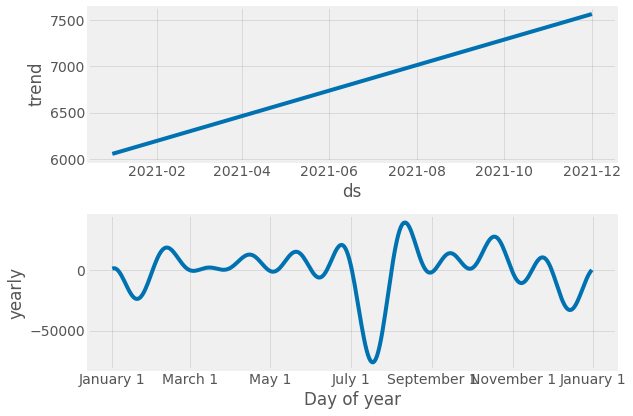

In [ ]:
fig = m.plot_components(pred)
plt.show()

In [ ]:
df_pred = pred[['ds', 'yhat']]
df_test

,ds,y
0,2021-01-01,5314.0
1,2021-02-01,4580.0
2,2021-03-01,5694.0
3,2021-04-01,6270.0
4,2021-05-01,4618.0
5,2021-06-01,5000.0
6,2021-07-01,9213.0
7,2021-08-01,2662.0
8,2021-09-01,3826.0
9,2021-10-01,6001.0


In [ ]:
df_pred = df_pred.set_index('ds')
df_test = df_test.set_index('ds')

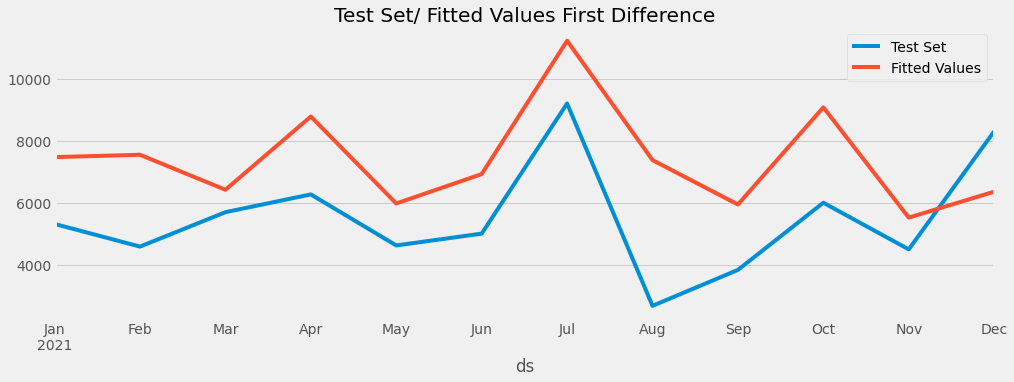

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
df_test.plot(ax=ax, label='Training Set', title='Test Set/ Fitted Values First Difference')
df_pred.plot(ax=ax, label='Prediction')
ax.legend(['Test Set', 'Fitted Values'])
plt.show()

In [ ]:
np.sqrt(mean_squared_error(y_true=df_test['y'],
                   y_pred=df_pred['yhat']))

2436.794954090971

In [ ]:
mean_absolute_error(y_true=df_test['y'],
                   y_pred=df_pred['yhat'])

2217.320511205722

In [ ]:
mean_absolute_percentage_error(y_true=df_test['y'],
                   y_pred=df_pred['yhat'])

0.4825576935969096